**Họ và tên: Võ Hoàng Thông </br>
MSSV: 18521462 </br>
Lab 4**

**Câu 1: Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.**

In [2]:
import pandas as pd
import io
from io import BytesIO
from urllib.request import Request, urlopen
link = 'https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv'
url = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
df = pd.read_csv(BytesIO(urlopen(url).read()))
df.sample(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
108,0,161,peugot,std,four,sedan,rwd,front,107.9,0.897165,0.950000,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,15580,12.368421,Low,0,1
23,1,148,dodge,std,four,hatchback,fwd,front,93.7,0.755887,0.886111,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229,7.580645,Low,0,1
184,2,94,volkswagen,std,four,sedan,fwd,front,97.3,0.825084,0.909722,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100.0,5500.0,26,32,9995,9.038462,Low,0,1
188,0,122,volkswagen,turbo,four,sedan,fwd,front,100.4,0.865930,0.929167,55.1,2579,ohc,four,97,idi,3.01,3.40,23.0,68.0,4500.0,33,38,13845,7.121212,Low,1,0
153,0,91,toyota,std,four,hatchback,fwd,front,95.7,0.799135,0.894444,52.8,2109,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,30,37,7198,7.833333,Low,0,1
185,3,122,volkswagen,std,two,convertible,fwd,front,94.5,0.765497,0.891667,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,11595,9.791667,Low,0,1
109,0,161,peugot,turbo,four,sedan,rwd,front,107.9,0.897165,0.950000,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900,8.392857,Low,1,0
149,0,77,toyota,std,four,wagon,fwd,front,95.7,0.815473,0.883333,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,37,6918,7.580645,Low,0,1
90,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,0.886111,53.5,2024,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7349,7.580645,Low,0,1
48,1,104,mazda,std,two,hatchback,fwd,front,93.1,0.764536,0.891667,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095,7.580645,Low,0,1


**Số sample của dataset**

In [3]:
df.shape[0]

201

**Số lượng features**

In [4]:
df.shape[1] 

29

**Câu 2: Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?** 

In [5]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [6]:
if df.isnull().sum().sum() > 0:
    print("Khuyết giá trị")
else:
    print("Không khuyết")

Không khuyết


**Câu 3:  Phát triển mô hình hồi quy đơn biến cho từng feature sau 'curb-weight", 'engine-size', 'length', 'width', "horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.**

In [7]:
prediction_model = []

In [8]:
from sklearn.linear_model import LinearRegression
features = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']
model_of_features = []
for i in range(len(features)):
    lm = LinearRegression()
    X = df[[features[i]]]
    Y = df['price']
    lm.fit(X, Y)
    prediction_model.append(lm.predict(X))
    model_of_features.append(lm)
    # Yhat = lm.predict(X)
    # print(Yhat - Y)#Noise

**Câu 4: Phát họa regression plot và residual plot cho các feature sau 'curb-weight", 'engine-size', 'length', 'width', 'horsepower", "city-mpg', 'highway-mpg', 'wheel-base', 'bore'.**

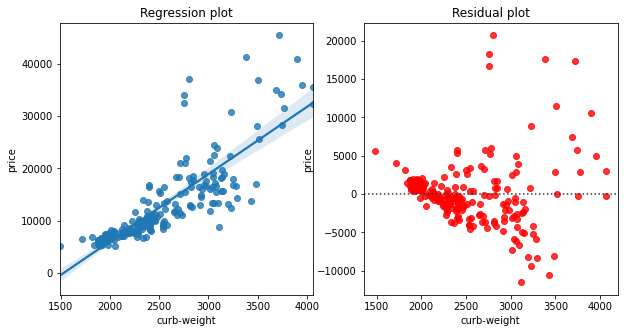

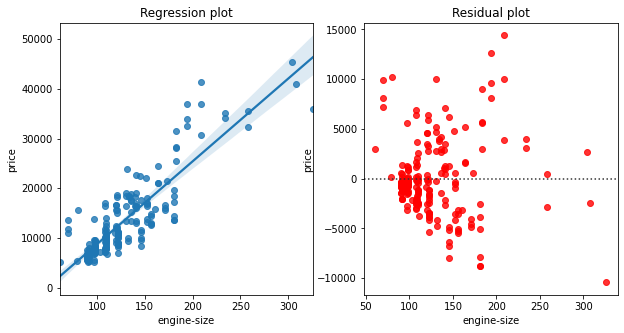

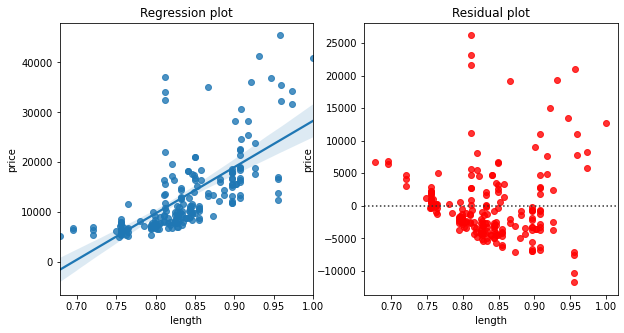

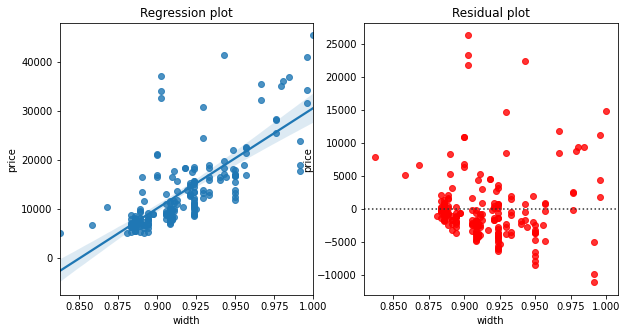

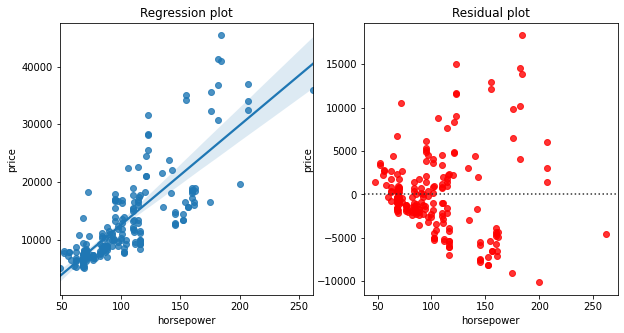

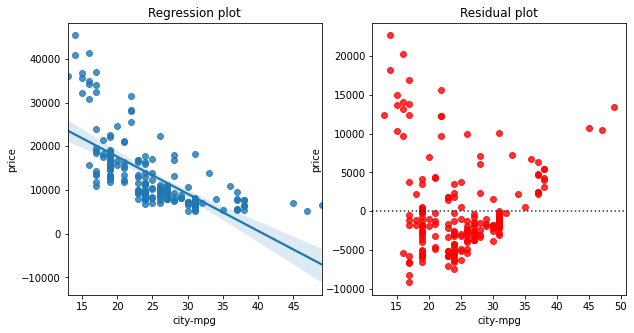

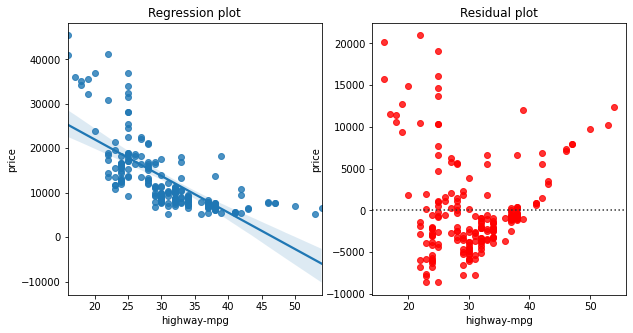

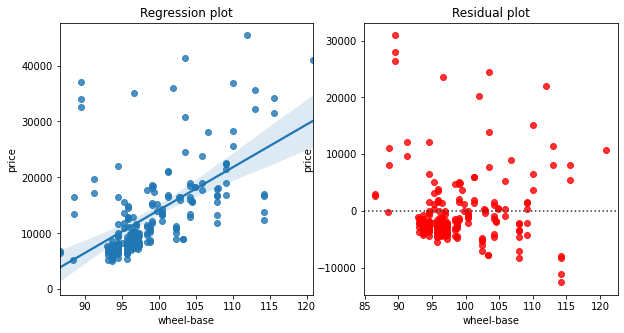

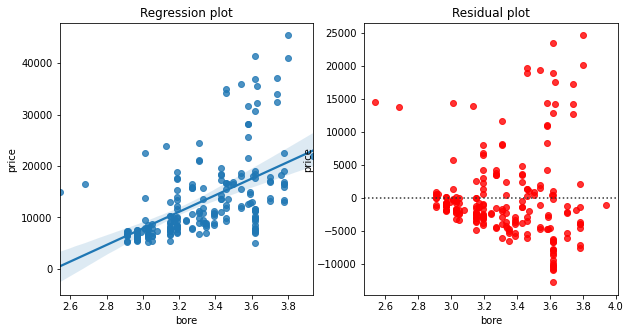

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in features:
    sns.color_palette("flare", as_cmap=True)
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Regression plot")
    sns.regplot(x = feature, y = 'price', data = df)
    plt.subplot(1, 2, 2)
    plt.title("Residual plot")
    sns.residplot(x = feature, y = 'price', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

**Câu 5. Dựa vào residual plot của cậu 4, chuẩn đoán xem feature nào có thể phát
triển theo phương pháp hồi quy tuyến tính? Giải thích lý do.**

**Curb-weight, engine-size, length, width, horsepower, city-mpg, highway-mpg, wheel-base, bore:** Các điểm dữ liệu phân bố không đồng đều và rải rác có dạng đường cong trong khi mô hình có dạng tuyến tính đường thẳng. Vậy các mô hình hồi quy tuyến tính đơn biến được xây dựng trên các thuộc tính trên không phù hợp. </br>


**Câu 6. Xây dựng mô hình hồi quy đa biến cho các feature sau 'horse', 'Power', 'curb', weight', 'engine-size', 'highway-mpg'.**

In [10]:
lm = LinearRegression()
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
prediction_model.append(lm.predict(X))

**Câu 7. Xây dựng mô hình hội quy đa biến cho các feature sau 'horsepower', 'highway-mpg'**

In [12]:
lm = LinearRegression()
X = df[['horsepower', 'highway-mpg']]
Y = df['price']
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
prediction_model.append(lm.predict(X))

**Câu 8. Xây dựng mô hình hồi quy đa biến cho các feature được cho là quan trọng**

Các thuộc tính trên không phù hợp nên đã loại bỏ.

**Câu 9. Phát họa distribution plot thể hiện giữa giá trị thực và giá trị dự đoán từ các mô hình đã xây dựng**

11


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


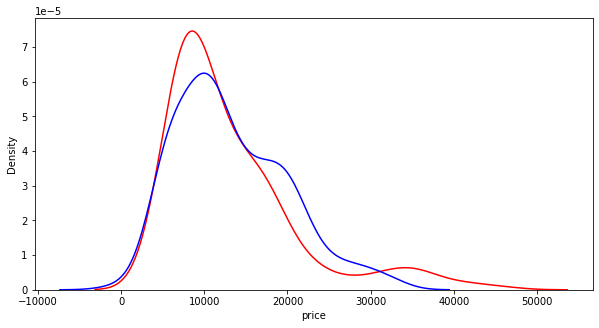

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


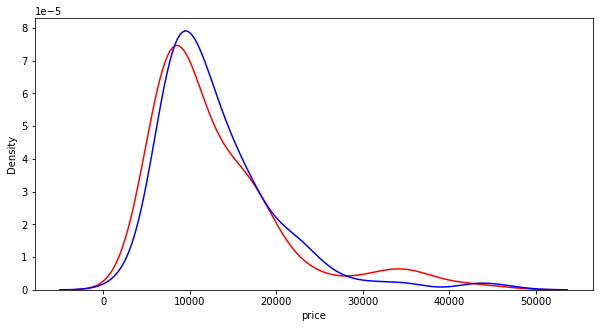

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


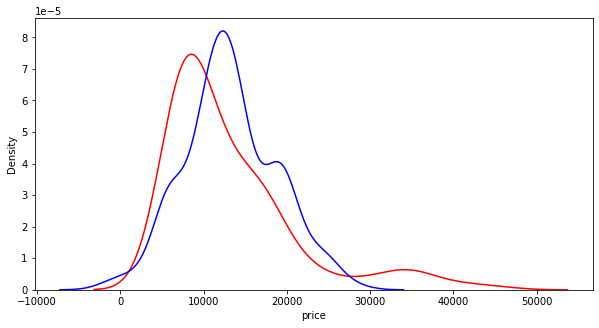

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


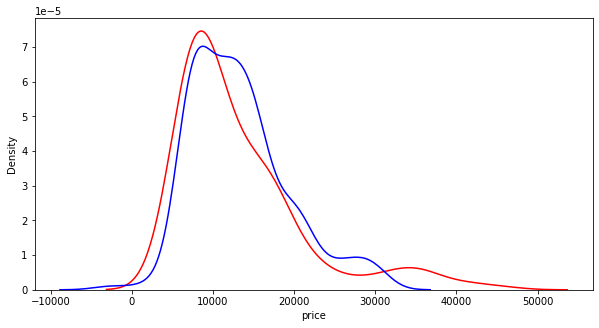

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


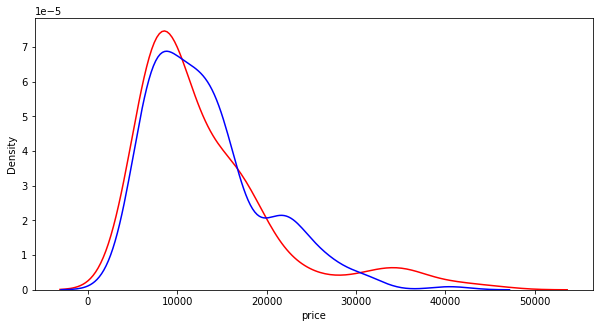

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


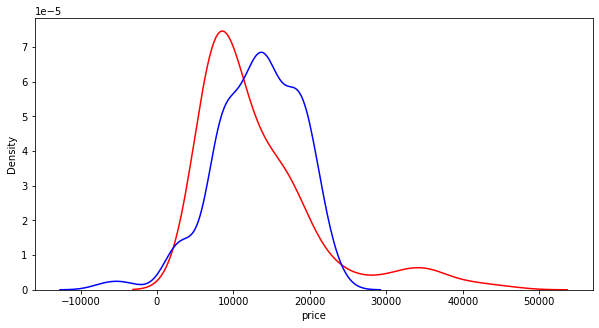

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


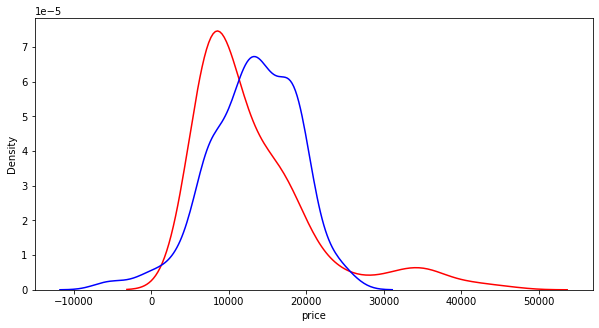

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


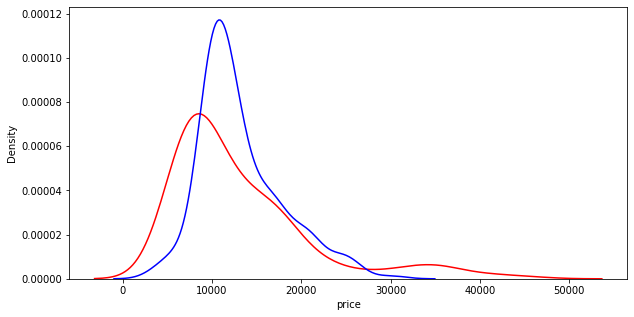

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


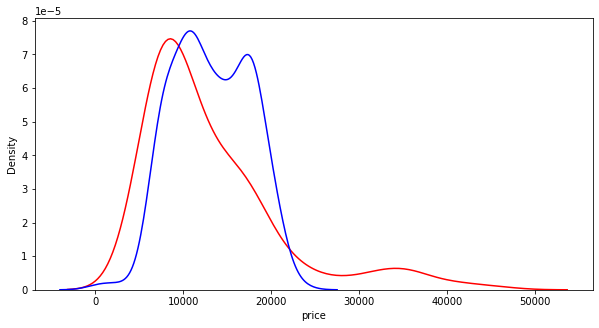

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


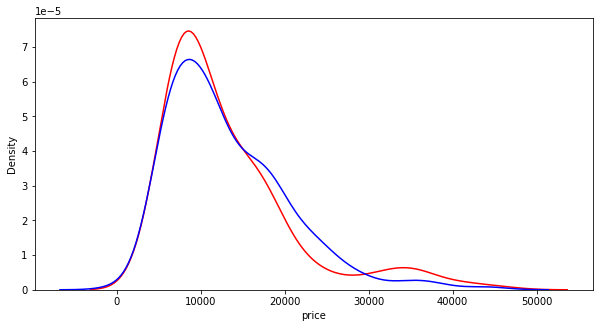

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


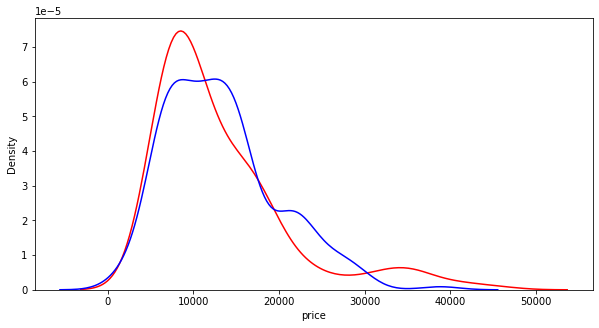

In [14]:
print(len(prediction_model))
for i in range(len(prediction_model)):
    fig, axes = plt.subplots(1, 1, figsize = (10, 5))
    ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
    sns.distplot(prediction_model[i], hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
    plt.show()

**Câu 10. Dựa vào các distribution plot và residual plot nhận xét xem các feature nào là quan trọng để phát triển mô hình.**

- Mô hình thứ 2 và mô hình kế cuối với 2 plot tương đồng với nhau. 
- Mô hình với thuộc tính engine-size và mô hình với các thuộc tính 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.

**Câu 11. Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc "curb', 'weight', 'engine-size', 'length', 'width', 'horsepower' 'city-mpg', 'highwaympg', 'wheel-base', 'bore'.**

In [25]:
def predict_features(features):
    Z = pd.DataFrame()
    for i in range(len(features)):
        Z = pd.concat([Z, df[features[i]]], axis = 1)
    lm.fit(Z, df['price'])
    Yhat = lm.predict(Z)
    return Yhat

In [26]:
predict_features(['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'])

array([13699.11161184, 13699.11161184, 19051.65470248, 10620.36193018,
       15521.31420205, 13869.66673208, 15456.16196728, 15974.00907669,
       17612.35917167, 10722.32509099, 10722.32509099, 17804.80307395,
       18063.72662866, 19320.78745062, 26968.56492812, 27674.72007732,
       28191.06772399,   650.62317705,  5648.50489651,  5813.27443132,
        5478.81383238,  5370.64136588,  8739.61952029,  5799.0421564 ,
        5902.61157828,  5902.61157828,  9036.20468296, 11863.43973754,
       18767.70667008,  4808.30901037,  5693.32889067,  4006.47212656,
        6118.7307557 ,  6194.05397162,  6448.26982533,  6514.17763926,
        9478.65495234,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719943, 10423.81935061,  9463.46710745, 12626.61544365,
       34470.0389549 , 34470.0389549 , 43996.52260539,  5265.67702181,
        5565.15645357,  5588.69495855,  5777.00299833,  5800.54150331,
        7337.21461798,  7337.21461798,  7360.75312295, 10536.29667937,
      